## Lab 2 

In [1]:
# lägg till inititala moduler/paket 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import cv2
import os



In [2]:
# start EDA

data_path = Path().absolute() / "original_data"
data_path_test=data_path / "test/test"
data_path_train=data_path / "train/train"
print(f"{data_path_test=}")
print(f"{data_path_train=}")

# test 1.jpg - 12500.jpg
# train  cat0.jpg - cat12499.jpg, dog0-12499.jpg



data_path_test=WindowsPath('c:/Source/AI-deep_learning/original_data/test/test')
data_path_train=WindowsPath('c:/Source/AI-deep_learning/original_data/train/train')


type(image) = <class 'numpy.ndarray'>
image.shape = (199, 187, 3)


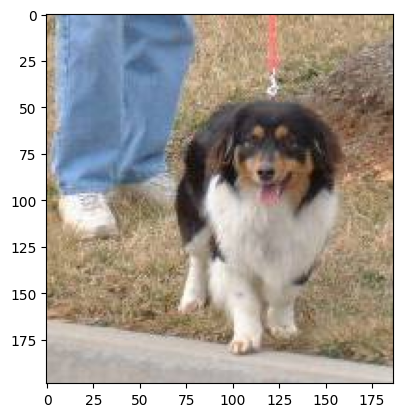

In [3]:
image = plt.imread(data_path_train / "dog.2.jpg")

print(f"{type(image) = }")
# the last dimension indicates that its colors and in 
# open cv it is actually BGR and not RGB 
print(f"{image.shape = }")
min(image.flatten()), max(image.flatten()) 

plt.imshow(image)

Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.

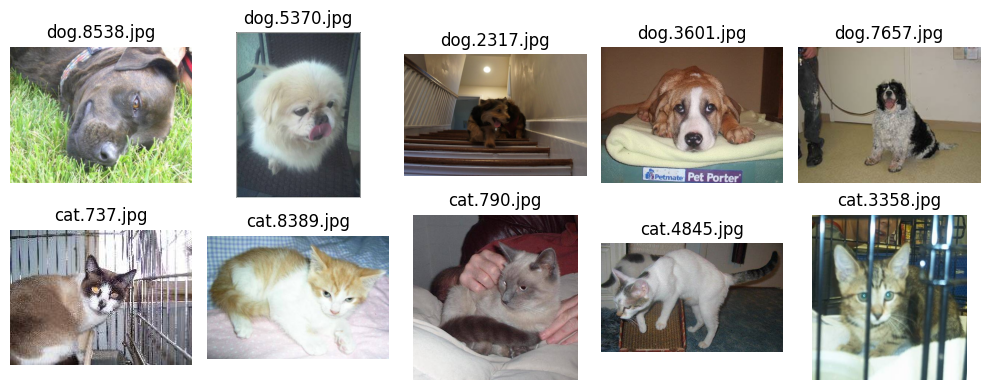

In [4]:
# Funktion för att skapa unika index (till bilder), inspiration från Stack Overflow
# equalizing size to similar
size_x=80
size_y=80

def createImageIndexList(number, start=1, end=100, typeofimage="dog"):   
    pulled_im = []
    label_im=[]
    arr = np.random.choice(np.arange(start, end + 1), size=number, replace=False)
    for index in arr:
        image = typeofimage+ "." + str(index) + ".jpg"
        label_im.append(image)
        what=plt.imread(data_path_train / image)
        # pulled_im.append(cv2.resize(what,(size_x, size_y)))
        pulled_im.append(what)
    return pulled_im, label_im
 
# obtain images of dogs and cats
# train  cat0.jpg - cat12499.jpg, dog0-12499.jpg
dog_images, dog_labels=createImageIndexList(5, 0, 12499, "dog") 
cat_images, cat_labels=createImageIndexList(5, 0, 12499, "cat")

ten_images=dog_images + cat_images
ten_labels=dog_labels + cat_labels
#print(createImageIndexList(5))

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    # resized_image = cv2.resize(image, new_size)
    ax.imshow(ten_images[i])
    ax.axis("off")
    ax.set_title(f"{ten_labels[i]}")
fig.tight_layout()


 Skapa folderstrukturen nedan med Python:
 .
├── experiment_small_data
│   ├── test
│   ├── train
│   └── val
├── experiment_tiny_data
│   ├── test
│   ├── train
│   └── val
├── lab.ipynb 
└── original_data
 ├── test
 │   └── test
 └── train
     └── train

In [5]:
# with som influence from Stack Overflow

def create_folderstruct(main_folder):
    path = Path(main_folder)
    # Check whether the specified path exists or not
    isExist = os.path.exists(path)
    if not isExist:
        # Create a new directory because it does not exist
        os.makedirs(path)
        os.mkdir(path / "test")
        os.mkdir(path / "train")
        os.mkdir(path / "val")
        print("The new directory is created!")

create_folderstruct("experiment_small_data")
create_folderstruct("experiment_tiny_data")


train|val|test split med följande splits:
    experiment_small
        train - 1600 (800 dogs, 800 cats)
        val - 400 (200 dogs, 200 cats)
        test - 500 (250 dogs, 250 cats)
    experiment_tiny (BONUS)
        train - 160 (80 dogs, 80 cats)
        val - 40 (20 dogs, 20 cats)
        test - 50 (25 dogs, 25 cats)
Det är inte så farligt om det inte blir exakt balanserade dataset.
Det är viktigt att du samplar slumpmässigt utan replacement från originaldatasetet under respektive
experiment. Spara datan i deras respektive mappar.

Experiment small - split och spara data

In [6]:
from sklearn.model_selection import train_test_split
import pickle

# experimental small
dog_images, dog_labels=createImageIndexList(1250, 0, 12499, "dog") 
cat_images, cat_labels=createImageIndexList(1250, 0, 12499, "cat")

# initial split - obs x_test och y_test måste sättas om till 1 (dog) resp 0 (cat) 

train_label_dogs=["Dog" for i in dog_labels]
train_label_cats=["Cat" for i in cat_labels]

X_train_dogs, X_test_dogs, y_train_dogs, y_test_dogs = train_test_split(
    dog_images, train_label_dogs, test_size=0.2, random_state=42)

# split X_train så vi får ett validerings set
X_train2_dogs, X_val_dogs, y_train2_dogs, y_val_dogs = train_test_split(
    X_train_dogs, y_train_dogs, test_size=0.2, random_state=42)


X_train_cats, X_test_cats, y_train_cats, y_test_cats = train_test_split(
    cat_images, train_label_cats, test_size=0.2, random_state=42)

# split X_train så vi får ett validerings set
X_train2_cats, X_val_cats, y_train2_cats, y_val_cats = train_test_split(
    X_train_cats, y_train_cats, test_size=0.2, random_state=42)

# merge dogs and cats data, full set
X_train=X_train_dogs + X_train_cats
y_train = y_train_dogs + y_train_cats
X_test=X_test_dogs + X_test_cats
y_test = y_test_dogs + y_test_cats
# tuning sets
X_train2=X_train2_dogs + X_train2_cats
y_train2=y_train2_dogs + y_train2_dogs
X_val=X_val_dogs + X_val_cats
y_val=y_val_dogs + y_val_cats
# Funktion för att spara datan
def save_data(pathfile, the_data):
    f = open(pathfile, 'wb')
    pickle.dump(the_data, f)
    f.close()


save_data("experiment_small_data/train/train.dat", [X_train, y_train])
save_data("experiment_small_data/test/test.dat",[X_test, y_test])
save_data("experiment_small_data/train/train2.dat",[X_train2, y_train2])
save_data("experiment_small_data/val/validate.dat",[X_val, y_val])


Tiny data split och spara 

In [7]:
# experimental tiny
dog_images, dog_labels=createImageIndexList(125, 0, 12499, "dog") 
cat_images, cat_labels=createImageIndexList(125, 0, 12499, "cat")

# initial split - obs x_test och y_test måste sättas om till 1 (dog) resp 0 (cat) 

train_label_dogs=["Dog" for i in dog_labels]
train_label_cats=["Cat" for i in cat_labels]

X_train_dogs, X_test_dogs, y_train_dogs, y_test_dogs = train_test_split(
    dog_images, train_label_dogs, test_size=0.2, random_state=42)

# split X_train så vi får ett validerings set
X_train2_dogs, X_val_dogs, y_train2_dogs, y_val_dogs = train_test_split(
    X_train_dogs, y_train_dogs, test_size=0.2, random_state=42)


X_train_cats, X_test_cats, y_train_cats, y_test_cats = train_test_split(
    cat_images, train_label_cats, test_size=0.2, random_state=42)

# split X_train så vi får ett validerings set
X_train2_cats, X_val_cats, y_train2_cats, y_val_cats = train_test_split(
    X_train_cats, y_train_cats, test_size=0.2, random_state=42)

# merge dogs and cats data, full set
X_train=X_train_dogs + X_train_cats
y_train = y_train_dogs + y_train_cats
X_test=X_test_dogs + X_test_cats
y_test = y_test_dogs + y_test_cats
# tuning sets
X_train2=X_train2_dogs + X_train2_cats
y_train2=y_train2_dogs + y_train2_dogs
X_val=X_val_dogs + X_val_cats
y_val=y_val_dogs + y_val_cats



save_data("experiment_tiny_data/train/train.dat", [X_train, y_train])
save_data("experiment_tiny_data/test/test.dat",[X_test, y_test])
save_data("experiment_tiny_data/train/train2.dat",[X_train2, y_train2])
save_data("experiment_tiny_data/val/validate.dat",[X_val, y_val])


Läs in dataseten från experiment_small, experiment_tiny (BONUS) och plocka ut labelsvektorer, som ska vara one-hot encoded med 0 och 1.

Experiment small - läsa data

In [8]:
# Funktion för att läsa data
def load_data(pathfile):
    f = open(pathfile, 'rb')
    obj1, obj2 = pickle.load(f)
    f.close()
    arr = np.random.choice(np.arange(0, len(obj1)), size=len(obj1), replace=False)
    obj3=[obj1[i] for i in arr]
    obj4=[obj2[i] for i in arr]
    return [obj3, obj4]

# Läs in data till variabler
X_train, y_train=load_data("experiment_small_data/train/train.dat")
X_test, y_test=load_data("experiment_small_data/test/test.dat")
X_train2, y_train2 =load_data("experiment_small_data/train/train2.dat")
X_val, y_val=load_data("experiment_small_data/val/validate.dat")

X_train_tiny, y_train_tiny=load_data("experiment_tiny_data/train/train.dat", )
X_test_tiny, y_test_tiny=load_data("experiment_tiny_data/test/test.dat")
X_train2_tiny, y_train2_tiny=load_data("experiment_tiny_data/train/train2.dat")
X_val_tiny, y_val_tiny=load_data("experiment_tiny_data/val/validate.dat")


Ändra till one hot encoding för label vektorer (y_xxxx)

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from numpy import array
from numpy import argmax

def toOneHot(data):
    data = data 
    values = array(data)
    label_encoder = LabelEncoder()
    int_encoded = label_encoder.fit_transform(values)
    encoded = to_categorical(int_encoded)
    return encoded
# Y_xxx -> y_train, y_test, y_train2, y_val (experimental small)
# y_xxx -> y_train_tiny, y_test_tiny, y_train2_tiny, y_val_tiny

y_train=toOneHot(y_train)
y_test=toOneHot(y_test)
y_train2=toOneHot(y_train2) 
y_val=toOneHot(y_val)

y_train_tiny=toOneHot(y_train_tiny)
y_test_tiny=toOneHot(y_test_tiny) 
y_train2_tiny=toOneHot(y_train2_tiny) 
y_val_tiny=toOneHot(y_val_tiny)



Bilder slumpmässigt valda med label

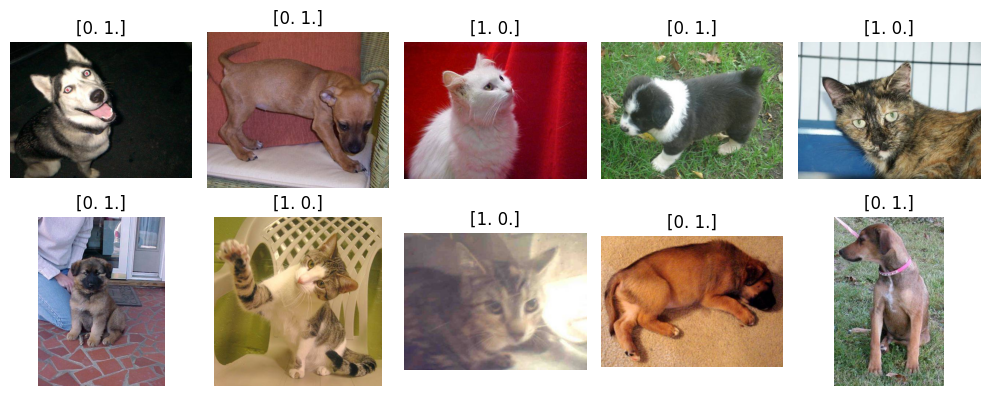

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    # resized_image = cv2.resize(image, new_size)
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}")
fig.tight_layout()

# 1. Bildbehandling

Undersökning av bildstorlek 

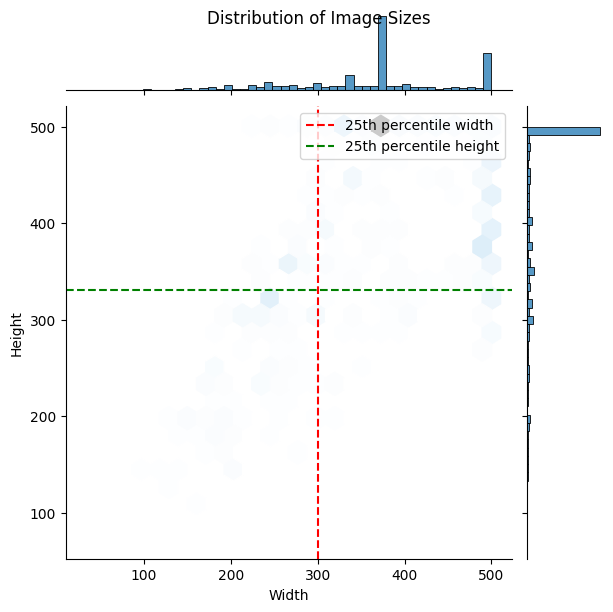

In [11]:
# Storleken för respektive bild till en array, med viss hjälp från chatGPT


image_sizes = np.array([img.shape[:2] for img in X_train])
image_sizes2 = np.array([img.shape[:2] for img in X_train2])


width_q1 = np.percentile(image_sizes[:, 0], 25)
height_q1 = np.percentile(image_sizes[:, 1], 25)

width_q3 = np.percentile(image_sizes[:, 0], 75)
height_q3 = np.percentile(image_sizes[:, 1], 75)

qv_w = width_q3-width_q1
qv_h = height_q3-height_q1

# Skapa en  joint plot
joint_plot =sns.jointplot(x=image_sizes[:, 0], y=image_sizes[:, 1], kind="hex", marginal_kws=dict(bins=50, fill=True))

joint_plot.ax_joint.axvline(width_q1, color='r', linestyle='--', label='25th percentile width')
joint_plot.ax_joint.axhline(height_q1, color='g', linestyle='--', label='25th percentile height')

plt.xlabel('Width')
plt.ylabel('Height')
plt.suptitle('Distribution of Image Sizes')
plt.legend()
plt.show()

Välj en lämplig bildstorlek att ändra samtliga bilder till. Gör en analys och fundera på om du behöver slänga bilder. Hur kommer du fram till ditt val?

Analys - plocka fram uteliggare för bildstorlek (utanför 1.5 * kvartilavståndet), obs endast bilder med låg upplösning (mindre än q1-1.5*kvatilavstånd)

Tar inte bort ur test data eller validering (då dessaär få och för att få CNN att generalisera utifrån "bra data")

Utgå från X_train sizes då detta har 2000 (större än X_train2) vid beräkning av uteliggare.

In [12]:

def scan_image_size(image_sizes_in):
    j=0
    remove_list=[]
    for i,x in enumerate(image_sizes_in):
        if ((image_sizes_in[i][0]<=((width_q1-qv_w*1.5))) | 
            (image_sizes_in[i][1]<=(height_q1-qv_h*1.5)) ):
            remove_list.append(i)
    tmp = sorted(remove_list, reverse=True)
    return tmp

# ta bort bilder från X_train/y_train som är uteliggare för hela dataset
# obs - tar inte bort x_test, använder det ev. för analys av generaliseringsförmåga  
rm_which = scan_image_size(image_sizes)
y_train=np.delete(y_train, rm_which,axis=0)
for x in rm_which:
    X_train.pop(x)

# ta bort från X_train2

rm_which = scan_image_size(image_sizes2)
y_train2= np.delete(y_train2, rm_which, axis=0)
for x in rm_which:
     X_train2.pop(x)




#print(len(X_train), len(X_train2)), print( rm_which)


In [13]:
print(len(y_train), len(X_train), len(y_train2), len(X_train2))

1958 1958 1566 1566


Göra om bilderna till en enhetlig storlek, t.ex. (150,150), (180,200), (120,120)


In [14]:
# inital setup - start with smallest (120,120)
# image_resize= np.array([cv2.reshape(image, (width, height)) for image in images])

size_x=120
size_y=120

def scale_images(image_arr):
    #output_arr = []
    #for image in image_arr:
        # output_arr.append(cv2.resize(image,(size_x, size_y)))
    output_arr = np.array([cv2.resize(image, (size_x, size_y)) for image in image_arr])
    return output_arr


X_train_scaled = scale_images(X_train)
X_train2_scaled = scale_images(X_train2)
X_test_scaled = scale_images(X_test)
X_val_scaled = scale_images(X_val)



Check the image array of image, row, col, color_channels, i.e. image 0 has (120, 120, 3)

In [15]:
X_train_scaled[0].shape

(120, 120, 3)

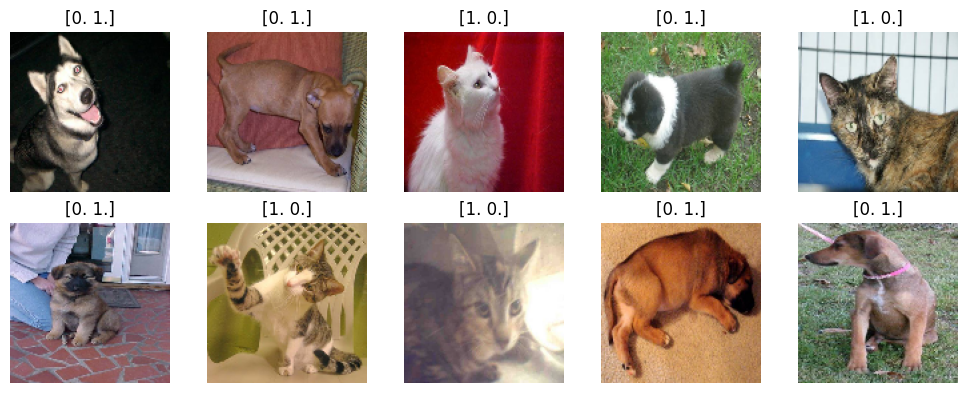

In [16]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    # resized_image = cv2.resize(image, new_size)
    ax.imshow(X_train_scaled[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}")
fig.tight_layout()

Augument data

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# help(ImageDataGenerator())

train_image_generator = ImageDataGenerator(
    rotation_range=35,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False, # allow flip around vertical axis (mirrored images)
    height_shift_range=0.1,
    width_shift_range=0.1,
)
# don't augment test data and validation data as we want to test on original data
# we just instantiate an ImageDataGenerator without augmentation
test_image_generator = ImageDataGenerator()

# batch size 32 for mini-batch gradient descent - gives stocasticity (avoid local minima)
# flow used for regenerating images after it has been exhausted
# this beacause we will train in many epochs
train_val_generator = train_image_generator.flow(
    X_val_scaled/255, y_val, batch_size=32
)

# batch size 32 for mini-batch gradient descent 
train_generator = train_image_generator.flow(
    X_train_scaled/255, y_train, batch_size=32
)

# train_generator[0][0].shape -> a 32 images batch

val_generator = test_image_generator.flow(X_val_scaled/255, y_val, batch_size=32)

# NumpyArrayIterator
train_val_generator, val_generator

(<keras.src.legacy.preprocessing.image.NumpyArrayIterator at 0x1bac87746d0>,
 <keras.src.legacy.preprocessing.image.NumpyArrayIterator at 0x1bac8126a50>)

In [18]:
X_val_scaled.shape, y_val.shape

((400, 120, 120, 3), (400, 2))

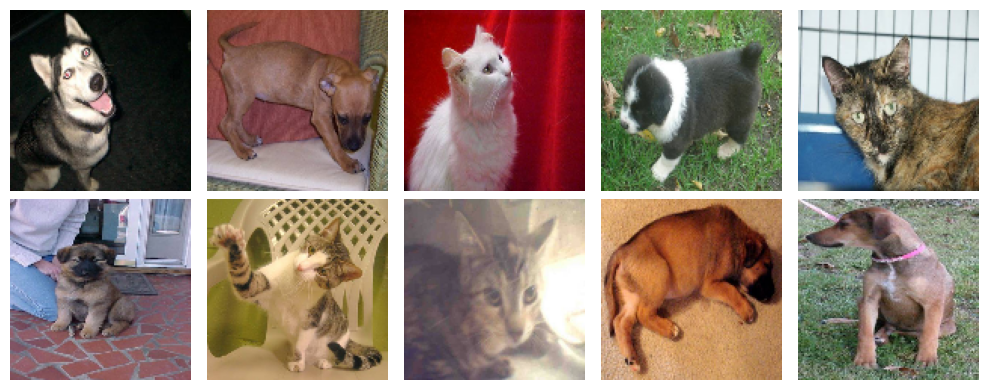

In [27]:
def plot_samples(data):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap = "gray")
        ax.axis("off")
    fig.tight_layout()

plot_samples(X_train_scaled/255)

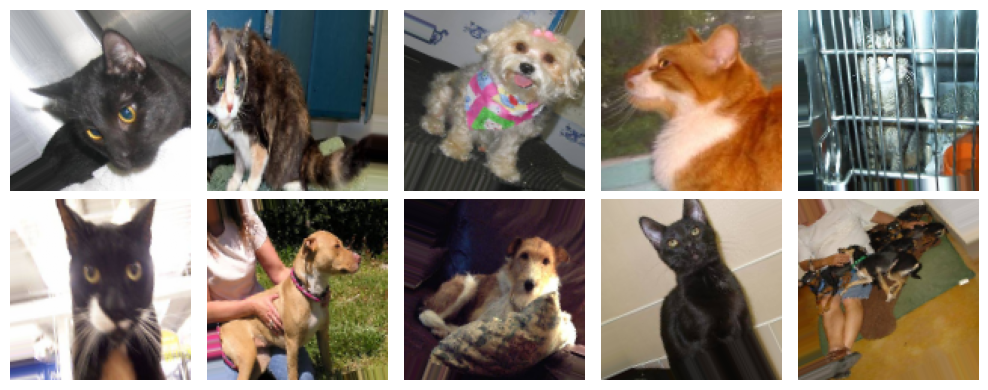

In [49]:
plot_samples(next(train_generator)[0])